# Introduction

In this notebook we will use the [Rain in Australia Dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package) from Kaggle.

To start we will load some basic libraries such as Pandas and NumPy and then make some configuration to some of those libraries.

In [26]:
# Meng-import library yang akan digunakan di proyek

# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import random as rd

## sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

# Data Pre-Processing

Before we can begin to create our first model we first need to load and pre-process. This step ensure that our model will receive a good data to learn from, as they said "a model is only as good as it's data". The data pre-processing will be divided into few steps as explained below.

## Loading data

In this first step we will load our dataset that has been uploaded on my GitHub for easier process. From the dataset documentation found [here](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package) 


In [27]:
# Mendapatkan data dari csv di github
df_rain = pd.read_csv('https://raw.githubusercontent.com/BayuSuryaAtmoko/rain-australia/main/weatherAUS.csv')

# Menampilkan ukuran data (instance dan attribute nya)
print('Shape of dataframe:', df_rain.shape)

# Menampilkan data sebanyak 5
df_rain.head(5)

Shape of dataframe: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Class Distribution

Another important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, '1' and '0', a class distribution of 50:50 can be considered ideal.

In [28]:
# Menampilkan jumlah data "RainTomorrow" yang bernilai 0 dan 1

df_rain['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

As we can see our class distribution is more or less similar, not exactly 50:50 distribution but still good enough.

## Missing Values

Last thing to check before moving on is missing values. In some case our data might have missing values in some column, this can be caused some reasons such as human error. We can use the `is_null()` function from Pandas to check for any missing data and then use the `sum()` function to see the total of missing values in each column.

In [29]:
# Mengecek apakah ada data instance yang memiliki data null(kosong)

df_rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [30]:
# Jika satu kolom mempunyai lebih dari 40% missing data, maka kolom itu akan dihapus.  

# Total dari instans data
totalColumn = len(df_rain)
print('Total of Column :', totalColumn)

# Menampilkan presentase missing data 
percent_missing = df_rain.isnull().sum() * 100 / totalColumn
print('\nPresentase missing data setiap kolom :')
missing_value_df = pd.DataFrame({'column_name': df_rain.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

Total of Column : 145460

Presentase missing data setiap kolom :
                 column_name  percent_missing
Date                    Date         0.000000
Location            Location         0.000000
MinTemp              MinTemp         1.020899
MaxTemp              MaxTemp         0.866905
Rainfall            Rainfall         2.241853
Evaporation      Evaporation        43.166506
Sunshine            Sunshine        48.009762
WindGustDir      WindGustDir         7.098859
WindGustSpeed  WindGustSpeed         7.055548
WindDir9am        WindDir9am         7.263853
WindDir3pm        WindDir3pm         2.906641
WindSpeed9am    WindSpeed9am         1.214767
WindSpeed3pm    WindSpeed3pm         2.105046
Humidity9am      Humidity9am         1.824557
Humidity3pm      Humidity3pm         3.098446
Pressure9am      Pressure9am        10.356799
Pressure3pm      Pressure3pm        10.331363
Cloud9am            Cloud9am        38.421559
Cloud3pm            Cloud3pm        40.807095
Temp9am        

In [31]:
# Reusable function untuk menantukan aksi terhadap missing data
def calculatePercentMissing(dataColumn, tittleColumn):

  # Hitung presentase missing data pada kolom tertentu
  totalColumn = len(df_rain)
  percentMissingDataColumn = dataColumn.isnull().sum() * 100 / totalColumn
  print('Presentase missing data kolom ' , tittleColumn , ' : ' , percentMissingDataColumn , ' %')

  # Hapus kolom jika mempunyai lebih dari 40% missing data
  if percentMissingDataColumn>40 :
    df_rain.drop(tittleColumn, inplace=True, axis=1)
    print(tittleColumn , ' mempunyai lebih dari 40% missing data maka akan dihapus.')
  else :
    # Data Interpolation
    # Mengisi data null menggunakan data yang paling banyak muncul
    df_rain[tittleColumn].fillna(df_rain[tittleColumn].mode()[0], inplace=True)
    print(tittleColumn , ' digunakan untuk penelitian ini.')

  print('\n')

In [32]:
# Menantukan aksi terhadap missing data
calculatePercentMissing(df_rain['Date'] , 'Date');
calculatePercentMissing(df_rain['Location'] , 'Location');
calculatePercentMissing(df_rain['MinTemp'] , 'MinTemp');
calculatePercentMissing(df_rain['MaxTemp'] , 'MaxTemp');
calculatePercentMissing(df_rain['Rainfall'] , 'Rainfall');
calculatePercentMissing(df_rain['Evaporation'] , 'Evaporation');
calculatePercentMissing(df_rain['Sunshine'] , 'Sunshine');
calculatePercentMissing(df_rain['WindGustDir'] , 'WindGustDir');
calculatePercentMissing(df_rain['WindGustSpeed'] , 'WindGustSpeed');
calculatePercentMissing(df_rain['WindDir9am'] , 'WindDir9am');
calculatePercentMissing(df_rain['WindDir3pm'] , 'WindDir3pm');
calculatePercentMissing(df_rain['WindSpeed9am'] , 'WindSpeed9am');
calculatePercentMissing(df_rain['WindSpeed3pm'] , 'WindSpeed3pm');
calculatePercentMissing(df_rain['Humidity9am'] , 'Humidity9am');
calculatePercentMissing(df_rain['Humidity3pm'] , 'Humidity3pm');
calculatePercentMissing(df_rain['Pressure9am'] , 'Pressure9am');
calculatePercentMissing(df_rain['Pressure3pm'] , 'Pressure3pm');
calculatePercentMissing(df_rain['Cloud9am'] , 'Cloud9am');
calculatePercentMissing(df_rain['Cloud3pm'] , 'Cloud3pm');
calculatePercentMissing(df_rain['Temp9am'] , 'Temp9am');
calculatePercentMissing(df_rain['Temp3pm'] , 'Temp3pm');
calculatePercentMissing(df_rain['RainToday'] , 'RainToday');
calculatePercentMissing(df_rain['RainTomorrow'] , 'RainTomorrow');

Presentase missing data kolom  Date  :  0.0  %
Date  digunakan untuk penelitian ini.


Presentase missing data kolom  Location  :  0.0  %
Location  digunakan untuk penelitian ini.


Presentase missing data kolom  MinTemp  :  1.0208992162793895  %
MinTemp  digunakan untuk penelitian ini.


Presentase missing data kolom  MaxTemp  :  0.8669049910628351  %
MaxTemp  digunakan untuk penelitian ini.


Presentase missing data kolom  Rainfall  :  2.241853430496356  %
Rainfall  digunakan untuk penelitian ini.


Presentase missing data kolom  Evaporation  :  43.1665062560154  %
Evaporation  mempunyai lebih dari 40% missing data maka akan dihapus.


Presentase missing data kolom  Sunshine  :  48.00976213391998  %
Sunshine  mempunyai lebih dari 40% missing data maka akan dihapus.


Presentase missing data kolom  WindGustDir  :  7.09885879279527  %
WindGustDir  digunakan untuk penelitian ini.


Presentase missing data kolom  WindGustSpeed  :  7.055547916953114  %
WindGustSpeed  digunakan untuk penel

In [33]:
# Menampilkan presentase missing data 
percent_missing = df_rain.isnull().sum() * 100 / totalColumn
print('\n')
print('Presentase missing data setiap kolom :')
missing_value_df = pd.DataFrame({'column_name': df_rain.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

# Menampilkan ukuran data (instance dan attribute nya)
print('\n')
print('Shape of dataframe:', df_rain.shape)

# Menampilkan data sebanyak 5
df_rain.head(5)



Presentase missing data setiap kolom :
                 column_name  percent_missing
Date                    Date              0.0
Location            Location              0.0
MinTemp              MinTemp              0.0
MaxTemp              MaxTemp              0.0
Rainfall            Rainfall              0.0
WindGustDir      WindGustDir              0.0
WindGustSpeed  WindGustSpeed              0.0
WindDir9am        WindDir9am              0.0
WindDir3pm        WindDir3pm              0.0
WindSpeed9am    WindSpeed9am              0.0
WindSpeed3pm    WindSpeed3pm              0.0
Humidity9am      Humidity9am              0.0
Humidity3pm      Humidity3pm              0.0
Pressure9am      Pressure9am              0.0
Pressure3pm      Pressure3pm              0.0
Cloud9am            Cloud9am              0.0
Temp9am              Temp9am              0.0
Temp3pm              Temp3pm              0.0
RainToday          RainToday              0.0
RainTomorrow    RainTomorrow           

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,No,No


## Data Encoding

In [34]:

df_rain_ready = pd.get_dummies(df_rain, prefix = ['Date'], columns = ['Date'])
df_rain_ready = pd.get_dummies(df_rain_ready, prefix = ['Location'], columns = ['Location'])
df_rain_ready = pd.get_dummies(df_rain_ready, prefix = ['WindGustDir'], columns = ['WindGustDir'])
df_rain_ready = pd.get_dummies(df_rain_ready, prefix = ['WindDir9am'], columns = ['WindDir9am'])
df_rain_ready = pd.get_dummies(df_rain_ready, prefix = ['WindDir3pm'], columns = ['WindDir3pm'])

# Mengganti value jika yes maka 1, jika no maka 0
df_rain_ready['RainToday'] = df_rain_ready['RainToday'].apply(lambda x: 1 if x=='Yes' else 1 if x=='yes' else 0)
df_rain_ready['RainTomorrow'] = df_rain_ready['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 1 if x=='yes' else 0)

# Menampilkan ukuran data (instance dan attribute nya)
print('Shape of dataframe:', df_rain_ready.shape)

# Menampilkan data sebanyak 5
df_rain_ready.head(5)

Shape of dataframe: (145460, 3548)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0


In [35]:

df_rain_ready['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [36]:

df_rain_ready['RainToday'].value_counts()

0    113580
1     31880
Name: RainToday, dtype: int64

## Normalisasi Data

In [37]:
# Normalisasi Data
d = preprocessing.normalize(df_rain_ready)
df_rain_normalize = pd.DataFrame(d, columns=df_rain_ready.columns)
print(df_rain_normalize)

         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.009383  0.016034  0.000420       0.030809      0.014004   
1       0.005176  0.017558  0.000000       0.030779      0.002798   
2       0.009032  0.017993  0.000000       0.032206      0.013302   
3       0.006400  0.019479  0.000000       0.016696      0.007652   
4       0.012234  0.022580  0.000699       0.028662      0.004893   
...          ...       ...       ...            ...           ...   
145455  0.001934  0.016161  0.000000       0.021410      0.008978   
145456  0.002489  0.017493  0.000000       0.015211      0.008988   
145457  0.003742  0.018639  0.000000       0.025637      0.006236   
145458  0.005410  0.018729  0.000000       0.019422      0.009017   
145459  0.010318  0.013850  0.000000       0.024238      0.011773   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
0           0.016805     0.049714     0.015404     0.705586     0.705166  ...   
1        

## Split Dataset for Training and Testing

To finish up our data pre-processing steps we will split our data into two dataset, training and testing. In this case because we have enough data we will split the data with ratio of 80:20 for training and testing respectively. This will result in our training data having 116368 rows and 29092 rows for the testing data.

In [38]:
# Membagi dataset menjadi 2 untuk training dan testing dengan rasio 80:20

# Pilih Features
feature = df_rain_normalize.drop('RainTomorrow', axis=1)

# Pilih Target
target = df_rain_normalize['RainTomorrow']

# Set Training dan Testing Data
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Menampilkan Training dan Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (116368, 3547)
Shape of testing feature: (29092, 3547)
Shape of training label: (116368,)
Shape of testing label: (29092,)


## Clustering menggunakan K-Means

In [39]:
# 

class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeanspp(self.X,self.K)
        
        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""
        
        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

In [40]:
#

X = df_rain_normalize.iloc[:, [3, 4]].values

In [41]:
#

df_rain_normalize.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,0.008462,0.016101,0.001603,0.027545,0.009705,0.012871,0.048137,0.035747,0.705768,0.704200,...,0.000038,0.000041,0.000047,0.000072,0.000045,0.000039,0.000045,0.000048,0.000042,0.000045
std,0.004440,0.004971,0.005822,0.009223,0.006172,0.006096,0.013309,0.014187,0.001111,0.000890,...,0.000157,0.000164,0.000175,0.000211,0.000170,0.000159,0.000170,0.000177,0.000166,0.000172
min,-0.005904,-0.003321,0.000000,0.004090,0.000000,0.000000,0.000000,0.000000,0.679356,0.679151,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005306,0.012437,0.000000,0.021462,0.004867,0.008957,0.039698,0.025742,0.705096,0.703687,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.008263,0.015627,0.000000,0.025678,0.009014,0.011896,0.048759,0.036065,0.705870,0.704257,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.011664,0.019571,0.000418,0.032073,0.013284,0.016652,0.058171,0.045122,0.706550,0.704784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.023716,0.033803,0.250659,0.094016,0.089921,0.060223,0.070992,0.070984,0.712840,0.712777,...,0.000716,0.000718,0.000712,0.000712,0.000716,0.000713,0.000716,0.000714,0.000714,0.000715


In [42]:
#

m=X.shape[0]
n_iter=100

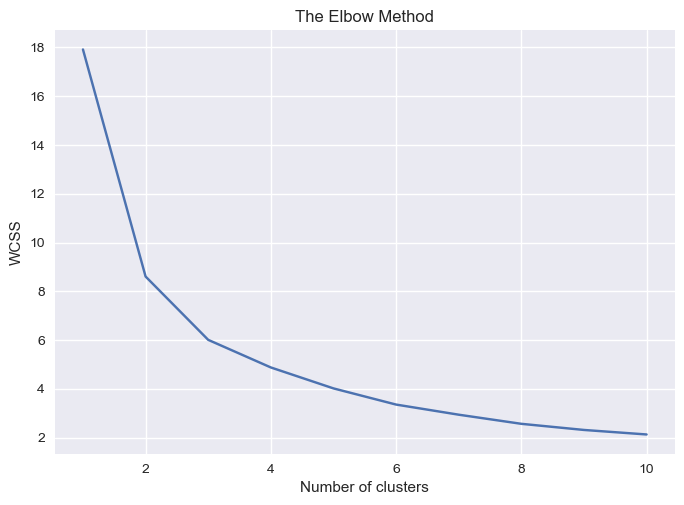

In [43]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

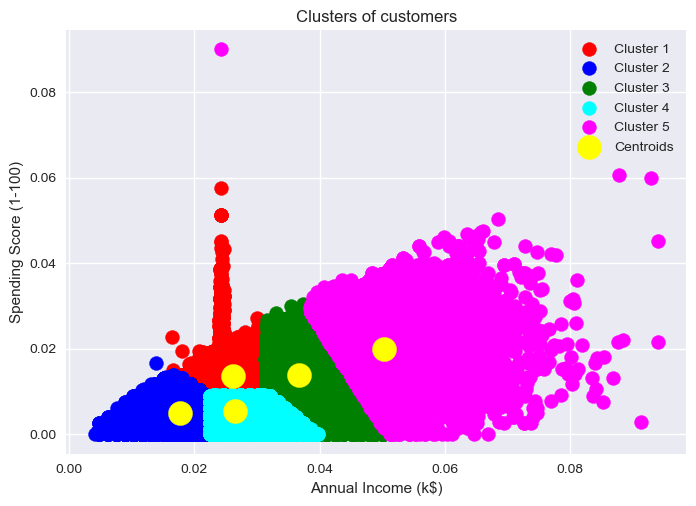

In [45]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [10]:
## Similarity Metric

## Masih Gagal

In [8]:
def euclidean_distance(x,y):
  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [ ]:
## Akurasi

## Masih Gagal

In [5]:
def avaliacao_clf(clf, features, labels, n_iters=1000):
    print (clf)
    
    # Creating list for outputs
    accuracy = []
    precision = []
    recall = []
    first = True
    
    # Creating a loop to thousand interactions
    for tentativa in range(n_iters):
        
        # Splinting data to test and traing
        features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3)

        # Applying the model
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        # Appending accuracy
        accuracy.append(accuracy_score(labels_test, predictions))
        # Appending precision
        precision.append(precision_score(labels_test, predictions))
        # Appending recall
        recall.append(recall_score(labels_test, predictions))

    # Taking the average of metrics for evaluating and implementing the results

    print ("precision: {}".format(mean(precision)))
    print ("recall:    {}".format(mean(recall)))
    print ("accuracy:    {}".format(mean(accuracy)))
    
    return mean(precision), mean(recall), mean(accuracy)

In [6]:
avaliacao_clf(k_clf, X, y)

NameError: name 'k_clf' is not defined